In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import time
import os
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from scipy import stats
import statsmodels.api as sm
from collections import defaultdict
from sklearn.metrics import accuracy_score,roc_curve,auc

/Applications/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def read_files(filename):
    data = pd.read_csv(filename)
    return data

In [3]:
directory = "../../Data/Symptoms_Demo/Train/"
for fn in os.listdir(directory):
    print(fn)

age3.csv
age2.csv
health_worker_facilitated.csv
age1.csv
individually_reported.csv
age5.csv
age4.csv
hongkong.csv
total.csv
female.csv
fluwatch.csv
male.csv
hutterite.csv
goviral.csv


In [4]:
coefficients = defaultdict()

In [14]:
symptoms = [
            'fever',
            'sorethroat',
            'cough',
            'muscle',
            'headache',
            'fatigue',
            'vomit',
            'nausea',
            'diarrhea',
            'chills',
            'sneeze',
            'shortness of breath',
            'phlegm',
            'blockednose',
            'earache',
            'leg pain',
            'runnynose']
target_variable = 'virus'

In [15]:
print(symptoms)

['fever', 'sorethroat', 'cough', 'muscle', 'headache', 'fatigue', 'vomit', 'nausea', 'diarrhea', 'chills', 'sneeze', 'shortness of breath', 'phlegm', 'blockednose', 'earache', 'leg pain', 'runnynose']


In [16]:
data_total = read_files(directory+"total.csv")

In [17]:
#check if any column has null values
def nullColumns(dataset):
    null_columns = []
    for column in dataset.columns.tolist():
        if(dataset[column].isnull().sum() > 0):
            print(column)
            null_columns = null_columns.append(column)
nullColumns(data_total)

In [18]:
#drop the rows with null values
def dropNull(dataset, null_list):
    dataset.dropna(axis=0,how='any', inplace = True)
    return dataset

data_with_target = dropNull(data_total, nullColumns)
print('The shape of  target variable after dropping NAN is', data_with_target.shape)
print('\nThe number of unique values in symtoms after dropping NAN is\n',data_with_target.nunique())
print('\n\nThe value counts of each target variable after dropping NAN is\n',data_with_target[target_variable].value_counts())

The shape of  target variable after dropping NAN is (5369, 18)

The number of unique values in symtoms after dropping NAN is
 fever                  2
sorethroat             2
cough                  2
muscle                 2
headache               2
fatigue                2
vomit                  2
nausea                 2
diarrhea               2
chills                 2
sneeze                 2
shortness of breath    2
phlegm                 2
blockednose            2
earache                1
leg pain               2
runnynose              2
virus                  2
dtype: int64


The value counts of each target variable after dropping NAN is
 0    3213
1    2156
Name: virus, dtype: int64


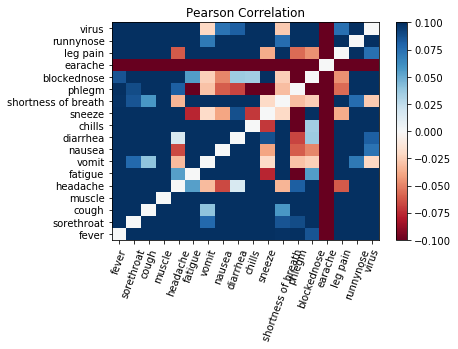

In [19]:
#finding the correlation between the features
from matplotlib import pyplot as plt

def correlationHeatMap(dataset):
    c_mat = dataset.corr()
    for i in range(c_mat.shape[0]):
        c_mat.iloc[i,i] = 0
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(c_mat, cmap=plt.cm.RdBu)
    ax.set_xticks(np.arange(c_mat.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(c_mat.shape[1])+0.5, minor=False)
    ax.set_xticklabels(c_mat.index.values,  rotation = 70, minor=False)
    ax.set_yticklabels(c_mat.index.values, minor=False)
    plt.title('Pearson Correlation')
    cbar = plt.colorbar(heatmap)
    plt.show()

correlationHeatMap(data_with_target)

In [20]:
def split_data(dataset):
    x = dataset[symptoms]
    y = dataset[target_variable]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1, random_state = 100)
    return x_train,x_test,y_train,y_test
    

In [21]:
def get_coeff(data):
    coefficients = []
    x_train,x_test,y_train,y_test = split_data(data)
#     print("Training data is :\n",x_train.head())
    logistic_regression = linear_model.LogisticRegression()
    x  = logistic_regression.fit(x_train,y_train)
    y_pred = logistic_regression.predict(x_test)
#     print("Predicted values are : ",y_pred)
    fpr,tpr,threshold = roc_curve(y_test,y_pred)
    auc_score = auc(fpr,tpr)
    accuracy = accuracy_score(y_test,y_pred)
    print("AUC is :",auc_score)
    lr_intercept = x.intercept_
    coefficients.append(lr_intercept.tolist()[0])
    coeff = x.coef_.tolist()[0]
    for i in coeff:
        coefficients.append(i)
    return coefficients,auc_score

In [22]:
data_total = read_files(directory+"total.csv")
coeff_total,accuracy = get_coeff(data_total)
print("_______________________________________")
print("Coefficients : \n",coeff_total)
coefficients['total'] = coeff_total


AUC is : 0.8767704966206288
_______________________________________
Coefficients : 
 [-3.331704889709875, 1.0380398823834103, 1.1429812666145942, 2.0530381724256017, -0.5584940938396064, -0.14750913691819018, 0.46367379704953093, -1.1580158197733796, -0.2269434009061229, -0.7316666593520371, 0.8912568879662197, 0.1963745943308811, -2.530642355896358, 2.3177338369406266, -0.058305046897870846, 0.0, -0.045566400180092934, 2.3990946098899846]


In [23]:
data_age1 = read_files(directory+"age1.csv")
coeff_age1,accuracy = get_coeff(data_age1)
print("_______________________________________")
print("Coefficients : \n",coeff_age1)
coefficients['age1'] = coeff_age1

AUC is : 0.8083333333333333
_______________________________________
Coefficients : 
 [-2.5933665845228426, 0.65768297768255, 0.9197751007934262, 1.977993263703727, -1.2023311375403507, -0.7306061082266027, 0.18344121361507143, 0.0, 0.07944024889044152, -0.8757992659913698, 0.793384446532938, 0.10182307554975048, 0.0, 1.559041903494198, 0.48069873165952076, 0.0, 0.0, 2.065635479951018]


In [24]:
data_age2 = read_files(directory+"age2.csv")
coeff_age2,accuracy = get_coeff(data_age2)
print("_______________________________________")
print("Coefficients : \n",coeff_age2)
coefficients['age2'] = coeff_age2

AUC is : 0.8838235294117648
_______________________________________
Coefficients : 
 [-3.3122256254627414, 1.7970546639380842, 1.3845249118752716, 2.081951101411182, -0.5791654413435363, -0.07569644278725862, 0.6893346351468965, 0.0, 0.0, -0.45611354048223063, 0.5001044696825386, 0.4512534009986443, 0.0, 2.0197711992472582, -0.5513281319788909, 0.0, 0.0, 2.264557811726183]


In [25]:
data_age3 = read_files(directory+"age3.csv")
coeff_age3,accuracy = get_coeff(data_age3)
print("_______________________________________")
print("Coefficients : \n",coeff_age3)
coefficients['age3'] = coeff_age3

AUC is : 0.8860708534621579
_______________________________________
Coefficients : 
 [-3.557182416392618, 1.404288117649029, 1.0608530585288667, 2.099337451384339, -0.27091040583019127, 0.2076264072710903, 0.5592264952016421, -1.1834978387813853, -0.6019732322887117, -0.6575119892566994, 0.38923054974686144, -0.21676481220629673, -1.5148225355062472, 2.5947964869185802, -0.2044216684430471, 0.0, 0.000548269206648501, 2.550382940824288]


In [26]:
data_age4 = read_files(directory+"age4.csv")
coeff_age4,accuracy = get_coeff(data_age4)
print("_______________________________________")
print("Coefficients : \n",coeff_age4)
coefficients['age4'] = coeff_age4

AUC is : 0.8690476190476191
_______________________________________
Coefficients : 
 [-3.2136705685679985, 0.7095598078861456, 0.6832947998397869, 1.693730053690114, -0.5455471135579831, 0.08009882753824597, 0.41468211707946795, -0.44100339834260904, 0.06851327446338448, 0.04088968346110361, 1.0581224958017539, 0.40306999008953825, -1.4927061241469564, 2.2686379103376306, 0.13972502698208322, 0.0, 0.3368143425266665, 2.2571687313213213]


In [27]:
data_age5 = read_files(directory+"age5.csv")
coeff_age5,accuracy = get_coeff(data_age5)
print("_______________________________________")
print("Coefficients : \n",coeff_age5)
coefficients['age5'] = coeff_age5

AUC is : 0.7555555555555556
_______________________________________
Coefficients : 
 [-2.416184620831752, 1.038961078379476, 0.9836251324182016, 1.3443651357169049, -1.470444375115517, -0.2799105473437735, 0.008162591455629793, -0.43460496153246053, -1.103204230449444, -0.035048199237880044, 1.0600005576013591, -0.5646717813109935, -1.500402250803987, 1.8515739957144204, 0.929579789830135, 0.0, 0.5740218528751299, 2.5901225840947526]


In [28]:
data_male = read_files(directory+"male.csv")
coeff_male,accuracy = get_coeff(data_male)
print("_______________________________________")
print("Coefficients : \n",coeff_male)
coefficients['male'] = coeff_male

AUC is : 0.9040032679738561
_______________________________________
Coefficients : 
 [-3.1904296172072497, 0.842433026154514, 0.9427889537232158, 2.216774567586194, -0.8720690250551031, -0.019567427875282935, 0.9941744440308161, -1.7811301491214142, -0.22377436336897016, -0.7066188056162159, 0.6973989203102918, 0.06714303791381665, -1.3302331354292478, 2.2479947808664633, 0.4720451936085834, 0.0, -0.019462281845011323, 2.1501639227080656]


In [29]:
data_female = read_files(directory+"female.csv")
coeff_female,accuracy = get_coeff(data_female)
print("_______________________________________")
print("Coefficients : \n",coeff_female)
coefficients['female'] = coeff_female

AUC is : 0.8935990338164252
_______________________________________
Coefficients : 
 [-3.519991140418783, 1.3311586423312096, 1.0954954615409935, 2.114138022792539, -0.5938534437698658, -0.06315317775120212, 0.332285827717164, -0.7939489464130453, -0.7307882689945017, -0.09319933025561021, 0.7631770377038855, 0.1315480681918713, -2.20055339616359, 2.6309052385918923, -0.5037766706889131, 0.0, -0.1837814472475547, 2.643910843000386]


In [31]:
# data_clinically_collected = read_files(directory+"clinically_collected.csv")
# coeff_clinically_collected,accuracy = get_coeff(data_clinically_collected)
# print("_______________________________________")
# print("Coefficients : \n",coeff_clinically_collected)
# coefficients['clinically_collected'] = coeff_clinically_collected

In [32]:
data_individually_reported = read_files(directory+"individually_reported.csv")
coeff_individually_reported,accuracy = get_coeff(data_individually_reported)
print("_______________________________________")
print("Coefficients : \n",coeff_individually_reported)
coefficients['individually_reported'] = coeff_individually_reported

AUC is : 0.7831996434937611
_______________________________________
Coefficients : 
 [-1.3889332886815557, -0.131000892483786, -0.04667629950858298, 0.5286884540198918, -0.7452552034385087, -0.45777129816469264, 0.9384582709752098, -0.7104230264069382, 0.09712929316082408, 0.07295905767338041, 0.74648338370602, 0.5660107966314946, -2.199790034852507, 0.0, 0.4180602832146201, 0.0, 0.188698152033582, 1.8944735225970988]


In [33]:
data_health_worker_facilitated = read_files(directory+"health_worker_facilitated.csv")
coeff_health_worker_facilitated,accuracy = get_coeff(data_health_worker_facilitated)
print("_______________________________________")
print("Coefficients : \n",coeff_health_worker_facilitated)
coefficients['health_worker_facilitated'] = coeff_health_worker_facilitated

AUC is : 0.9133485562056991
_______________________________________
Coefficients : 
 [-4.166904926646812, 3.415171526512496, 1.824738502944917, 2.9328641529471753, 0.1982560783990969, 0.33397520342220693, -0.7060485231988243, 0.0, 0.0, 0.0, -0.03998823171377373, 0.0, 0.0, 2.4379701039401525, -0.43736086186064393, 0.0, 0.0, 2.57793893097238]


In [35]:
# data_nyumc = read_files(directory+"nyumc.csv")
# coeff_nyumc,accuracy = get_coeff(data_nyumc)
# print("_______________________________________")
# print("Coefficients : \n",coeff_nyumc)
# coefficients['nyumc'] = coeff_nyumc


In [36]:
data_goviral = read_files(directory+"goviral.csv")
coeff_goviral,accuracy = get_coeff(data_goviral)
print("_______________________________________")
print("Coefficients : \n",coeff_goviral)
coefficients['goviral'] = coeff_goviral

AUC is : 0.7485119047619048
_______________________________________
Coefficients : 
 [-2.214729681988747, 0.5053531392004709, 0.7018989336908058, 1.0677617139296043, 0.23644330102042577, 0.0, 0.6080905390354205, -1.218028999788797, -0.23595000239926253, 0.03756195456726082, 0.3169984631779608, 0.0, -1.9482712564867986, 0.0, 0.0, 0.0, -0.546422009150311, 1.9865721929979843]


In [37]:
data_fluwatch = read_files(directory+"fluwatch.csv")
coeff_fluwatch,accuracy = get_coeff(data_fluwatch)
print("_______________________________________")
print("Coefficients : \n",coeff_fluwatch)
coefficients['fluwatch'] = coeff_fluwatch

AUC is : 0.7392026578073089
_______________________________________
Coefficients : 
 [-0.919856350609076, -0.42803269359106294, -0.5366405977062514, 0.2516570976028986, -0.8075147263541019, -0.5359891952224755, 0.0, 0.0, 0.0, 0.05045110980991648, 0.0, 0.8959538318736697, 0.0, 0.0, 0.6384343010506578, 0.0, 0.0, 1.821815558780896]


In [38]:
data_hongkong = read_files(directory+"hongkong.csv")
coeff_hongkong,accuracy = get_coeff(data_hongkong)
print("_______________________________________")
print("Coefficients : \n",coeff_hongkong)
coefficients['hongkong'] = coeff_hongkong

AUC is : 0.969362455726092
_______________________________________
Coefficients : 
 [-5.0612951504213335, 5.642610214918467, 2.051125668739619, 3.802353833221447, -0.55515651219493, 1.4526188290596131, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.977210132710434, 0.0, 0.0, 0.0, 2.6691466435603686]


In [39]:
data_hutterite = read_files(directory+"hutterite.csv")
coeff_hutterite,accuracy = get_coeff(data_hutterite)
print("_______________________________________")
print("Coefficients : \n",coeff_hutterite)
coefficients['hutterite'] = coeff_hutterite

AUC is : 0.7752100840336134
_______________________________________
Coefficients : 
 [-1.6341515827832664, 1.0341073737606286, 0.3585987108708458, 1.9974620148986026, -0.4310176881315541, -0.5636405795589532, -0.309300330065377, 0.0, 0.0, 0.0, 0.3172384625255391, 0.0, 0.0, 0.0, -0.8616063368519942, 0.0, 0.0, 1.6721354330563332]


In [69]:
def roundup_decimals(list_):
    ans = [round(i,6) for i in list_]
    return ans

defaultdict(None,
            {'age1': [-5.051295404388259,
              1.5093761478605834,
              -0.10919657052069189,
              2.807715845253092,
              -1.4895664750950817,
              -0.5746186421862205,
              0.9807535099260543,
              -1.6001618258709696,
              -0.09697857192925587,
              -1.3507904108471107,
              1.6401306891374228,
              0.4606038022694327,
              0.0,
              2.054917525662984,
              -0.9520661459345522,
              0.0,
              0.01912865631294684,
              5.090930460849543],
             'age2': [-2.2565314244744004,
              4.614315096426537,
              -0.4338656342490443,
              0.7286709579037495,
              -0.39533017850688135,
              -0.3983192267331997,
              0.07721380723265334,
              -0.6059623261457404,
              -1.432675234565324,
              -2.5493599553759743,
              0.6745883422642

In [86]:
results = pd.DataFrame.from_dict(coefficients)
results['symptoms'] = symptoms
cols = list(results.columns)
cols = cols[-1:] + cols[:-1]
results = results[cols]

In [87]:
results

,symptoms,age1,age2,age3,age4,age5,clinically_collected,female,fluwatch,goviral,health_worker_facilitated,hongkong,hutterite,individually_reported,male,nyumc,total
0,intercept,-5.051295,-2.256531,-2.367348,-3.506167,-3.272573,-2.462650,-2.158895,-0.638160,-1.355330,-2.646796,-2.953091,-0.743498,-0.844546,-2.553867,-2.462650,-2.328801
1,fever,1.509376,4.614315,4.977507,3.379462,-0.640087,2.372473,2.438421,0.016235,0.576168,1.639341,2.295022,0.773003,0.280666,1.980635,2.372473,2.198637
2,sorethroat,-0.109197,-0.433866,-0.891887,0.772239,-0.623370,-1.135307,-0.353297,-0.462084,0.608064,0.910134,1.066911,0.402238,-0.047193,0.033553,-1.135307,-0.177214
3,cough,2.807716,0.728671,1.833585,1.253134,5.987072,1.813480,1.032060,-0.320572,0.766582,1.797068,2.204161,0.718261,0.099533,2.356776,1.813480,1.665578
4,muscle,-1.489566,-0.395330,-0.486007,0.188802,-1.151021,0.204450,-0.186499,0.103201,0.120770,0.022060,-0.032413,-0.088741,-0.012070,0.221196,0.204450,-0.078111
5,headache,-0.574619,-0.398319,-0.131033,-0.478952,-0.695178,-2.579019,-0.326325,-0.124531,0.000000,-0.031626,-0.042977,-0.378578,-0.345478,-0.157238,-2.579019,-0.252283
6,fatigue,0.980754,0.077214,0.428173,-0.820467,-1.041101,-2.826730,0.061819,0.000000,0.462526,-0.193695,0.000000,-0.263868,0.718500,-0.744944,-2.826730,-0.134294
7,vomit,-1.600162,-0.605962,0.550882,-2.009480,-3.274529,-0.307565,-0.487005,0.000000,0.568420,0.000000,0.000000,0.000000,0.236715,-0.060807,-0.307565,-0.306317
8,nausea,-0.096979,-1.432675,-2.921152,0.408001,4.312138,-0.103084,-0.540783,0.000000,-0.654383,0.000000,0.000000,0.000000,-0.741448,0.512557,-0.103084,-0.112075
9,diarrhea,-1.350790,-2.549360,-4.868299,-2.737372,-0.437307,-3.612085,-2.363521,0.009453,-0.500197,0.000000,0.000000,0.000000,-0.014264,-2.852311,-3.612085,-2.463293


In [90]:
results['symptoms'] = symptoms
results['nyumc'] = coeff_nyumc
results['goviral'] = coeff_goviral
results['fluwatch'] = coeff_fluwatch
results['hongkong'] = coeff_hongkong
results['hutterite'] = coeff_hutterite
results['age 0-4'] = coeff_age1
results['age 5-15'] = coeff_age2
results['age 16-44'] = coeff_age3
results['age 45-64'] = coeff_age4
results['age 65+'] = coeff_age5
results['male'] = coeff_male
results['female'] = coeff_female
results['clinically collected'] = coeff_clinically_collected
results['individually collected'] = coeff_individually_reported
results['health worker facilitated'] = coeff_health_worker_facilitated
results['total'] =coeff_total

In [91]:
results.head()

,symptoms,age1,age2,age3,age4,age5,clinically_collected,female,fluwatch,goviral,...,nyumc,total,age 0-4,age 5-15,age 16-44,age 45-64,age 65+,clinically collected,individually collected,health worker facilitated
0,intercept,-5.051295,-2.256531,-2.367348,-3.506167,-3.272573,-2.462650,-2.158895,-0.638160,-1.355330,...,-2.462650,-2.328801,-5.051295,-2.256531,-2.367348,-3.506167,-3.272573,-2.462650,-0.844546,-2.646796
1,fever,1.509376,4.614315,4.977507,3.379462,-0.640087,2.372473,2.438421,0.016235,0.576168,...,2.372473,2.198637,1.509376,4.614315,4.977507,3.379462,-0.640087,2.372473,0.280666,1.639341
2,sorethroat,-0.109197,-0.433866,-0.891887,0.772239,-0.623370,-1.135307,-0.353297,-0.462084,0.608064,...,-1.135307,-0.177214,-0.109197,-0.433866,-0.891887,0.772239,-0.623370,-1.135307,-0.047193,0.910134
3,cough,2.807716,0.728671,1.833585,1.253134,5.987072,1.813480,1.032060,-0.320572,0.766582,...,1.813480,1.665578,2.807716,0.728671,1.833585,1.253134,5.987072,1.813480,0.099533,1.797068
4,muscle,-1.489566,-0.395330,-0.486007,0.188802,-1.151021,0.204450,-0.186499,0.103201,0.120770,...,0.204450,-0.078111,-1.489566,-0.395330,-0.486007,0.188802,-1.151021,0.204450,-0.012070,0.022060


In [92]:
results.set_index('symptoms')

,age1,age2,age3,age4,age5,clinically_collected,female,fluwatch,goviral,health_worker_facilitated,...,nyumc,total,age 0-4,age 5-15,age 16-44,age 45-64,age 65+,clinically collected,individually collected,health worker facilitated
symptoms,,,,,,,,,,,,,,,,,,,,,
intercept,-5.051295,-2.256531,-2.367348,-3.506167,-3.272573,-2.462650,-2.158895,-0.638160,-1.355330,-2.646796,...,-2.462650,-2.328801,-5.051295,-2.256531,-2.367348,-3.506167,-3.272573,-2.462650,-0.844546,-2.646796
fever,1.509376,4.614315,4.977507,3.379462,-0.640087,2.372473,2.438421,0.016235,0.576168,1.639341,...,2.372473,2.198637,1.509376,4.614315,4.977507,3.379462,-0.640087,2.372473,0.280666,1.639341
sorethroat,-0.109197,-0.433866,-0.891887,0.772239,-0.623370,-1.135307,-0.353297,-0.462084,0.608064,0.910134,...,-1.135307,-0.177214,-0.109197,-0.433866,-0.891887,0.772239,-0.623370,-1.135307,-0.047193,0.910134
cough,2.807716,0.728671,1.833585,1.253134,5.987072,1.813480,1.032060,-0.320572,0.766582,1.797068,...,1.813480,1.665578,2.807716,0.728671,1.833585,1.253134,5.987072,1.813480,0.099533,1.797068
muscle,-1.489566,-0.395330,-0.486007,0.188802,-1.151021,0.204450,-0.186499,0.103201,0.120770,0.022060,...,0.204450,-0.078111,-1.489566,-0.395330,-0.486007,0.188802,-1.151021,0.204450,-0.012070,0.022060
headache,-0.574619,-0.398319,-0.131033,-0.478952,-0.695178,-2.579019,-0.326325,-0.124531,0.000000,-0.031626,...,-2.579019,-0.252283,-0.574619,-0.398319,-0.131033,-0.478952,-0.695178,-2.579019,-0.345478,-0.031626
fatigue,0.980754,0.077214,0.428173,-0.820467,-1.041101,-2.826730,0.061819,0.000000,0.462526,-0.193695,...,-2.826730,-0.134294,0.980754,0.077214,0.428173,-0.820467,-1.041101,-2.826730,0.718500,-0.193695
vomit,-1.600162,-0.605962,0.550882,-2.009480,-3.274529,-0.307565,-0.487005,0.000000,0.568420,0.000000,...,-0.307565,-0.306317,-1.600162,-0.605962,0.550882,-2.009480,-3.274529,-0.307565,0.236715,0.000000
nausea,-0.096979,-1.432675,-2.921152,0.408001,4.312138,-0.103084,-0.540783,0.000000,-0.654383,0.000000,...,-0.103084,-0.112075,-0.096979,-1.432675,-2.921152,0.408001,4.312138,-0.103084,-0.741448,0.000000


In [89]:
results.to_csv("./Results/coefficients.csv",index = False)

##### Analyzing the change in the weights